## Security Data Science
### Laboratorio 1


In [ ]:
import re
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import feature_extraction, tree, model_selection, metrics
from sklearn.model_selection import train_test_split
from urllib.parse import urlparse

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, accuracy_score

In [ ]:
def url_info(url):
    parsed_url = urlparse(url)
    return parsed_url.hostname, parsed_url.scheme


def conteo(a):
    return lambda s: sum(s.count(b) for b in a)

#### Carga del dataset

In [ ]:
data = pd.read_csv ('dataset_pishing.csv')

#### Muestra las primeras 5 lineas

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 67 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   ip                          11430 non-null  int64  
 2   nb_www                      11430 non-null  int64  
 3   nb_com                      11430 non-null  int64  
 4   nb_dslash                   11430 non-null  int64  
 5   http_in_path                11430 non-null  int64  
 6   punycode                    11430 non-null  int64  
 7   port                        11430 non-null  int64  
 8   tld_in_path                 11430 non-null  int64  
 9   tld_in_subdomain            11430 non-null  int64  
 10  abnormal_subdomain          11430 non-null  int64  
 11  nb_subdomains               11430 non-null  int64  
 12  prefix_suffix               11430 non-null  int64  
 13  random_domain               114

In [ ]:
data.head()

,url,ip,nb_www,nb_com,nb_dslash,http_in_path,punycode,port,tld_in_path,tld_in_subdomain,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,0,1,0,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,1,0,0,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,1,0,1,0,0,0,0,0,1,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,0,0,0,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,0,1,0,0,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


#### Muestra la cuenta de observaciones en la columna de estatus

In [ ]:
data['status'].value_counts()

legitimate    5715
phishing      5715
Name: status, dtype: int64

Con el resultado podemos ver que el dataset esta balanceado, por la cantidad de url's que son marcadas como pshing como legitimos.

###**Derivacion**

#### F1 y F2



In [ ]:
data['url_len'] = data['url'].apply(len)

In [ ]:
data['hostname'], data['scheme'] = zip(*data['url'].apply(url_info))
data['hostname_len'] = data['hostname'].apply(len)

#### f4 - f20


In [ ]:
caracteres = ['.','-','@','?','&','|','=','_',' ̃','%','/','*',':',',',';','$']
espacios = ['%20', ' '] 

for caracter in caracteres:
    data[f'{caracter}_count'] = data['url'].apply(conteo(caracter))

data['space_count'] = data['url'].apply(conteo(espacios))

#### f25


In [ ]:
data['is_https'] = data['scheme'].apply(lambda scheme: int(scheme.lower() == 'https'))

#### f26 -f27


In [ ]:
rDigits = lambda s: sum(c.isdigit() for c in s) / sum(not c.isdigit() for c in s)
data['digit_ratio_url'] = data['url'].apply(rDigits)


In [ ]:
data['digit_ratio_hostname'] = data['url'].apply(rDigits)

#### Mostrar las primeras 5 lienas luego de la transformacion

In [ ]:
data.head()

,url,ip,nb_www,nb_com,nb_dslash,http_in_path,punycode,port,tld_in_path,tld_in_subdomain,...,/_count,*_count,:_count,",_count",;_count,$_count,space_count,is_https,digit_ratio_url,digit_ratio_hostname
0,http://www.crestonwood.com/router.php,0,1,0,0,0,0,0,0,0,...,3,0,1,0,0,0,0,0,0.000000,0.000000
1,http://shadetreetechnology.com/V4/validation/a...,1,0,0,0,0,0,0,0,0,...,5,0,1,0,0,0,0,0,0.283333,0.283333
2,https://support-appleld.com.secureupdate.duila...,1,0,1,0,0,0,0,0,1,...,5,0,1,0,0,0,0,1,0.177570,0.177570
3,http://rgipt.ac.in,0,0,0,0,0,0,0,0,0,...,2,0,1,0,0,0,0,0,0.000000,0.000000
4,http://www.iracing.com/tracks/gateway-motorspo...,0,1,0,0,0,0,0,0,0,...,5,0,1,0,0,0,0,0,0.000000,0.000000


#### Pre-procesamiento del dataset

In [ ]:
data['status'] = np.where(data['status'] == 'phishing', 1, 0)

In [ ]:
data = data.drop(['url'], axis=1)

#### Pandas Profiling

In [ ]:
profile = data.profile_report(title="Phishing dataset Report")
profile.to_file(output_file="lab1_pandas_report.html")

AttributeError: ignored

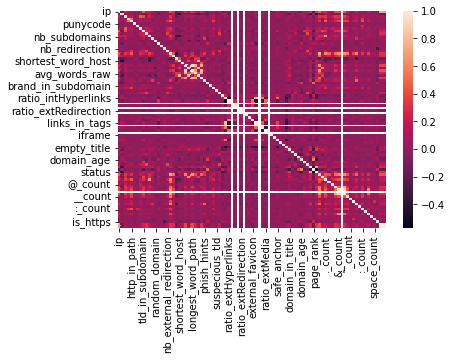

In [ ]:
sns.heatmap(data.corr())

Ya que no se logro utilzar Pandas Profaling, se opto por utilizar una matriz de confusion, aqui se muestra que no hay relacion con status.

#### Seleccion de caracteristicas

En base a la matriz de confusion, se pudieron identificar caracteristicas relevantes, son las siguientes: 

- ratio_intHyperlinks
- ratio_extHyperlinks
- domain_age
- web_traffic
- page_rank
- url_len
- hostname_len
- space_count
- digit_ratio_url
- status
- nb_www
- phish_hints
- nb_hyperlinks
- length_words_raw
- domain_in_title

In [ ]:
data = data[['status','nb_www', 'phish_hints', 'nb_hyperlinks', 'length_words_raw', 'domain_in_title', 'ratio_intHyperlinks', 'ratio_extHyperlinks', 'domain_age', 'web_traffic', 'page_rank', 'url_len', 'hostname_len', 'space_count', 'digit_ratio_url']]


In [ ]:
data.drop_duplicates()

,status,nb_www,phish_hints,nb_hyperlinks,length_words_raw,domain_in_title,ratio_intHyperlinks,ratio_extHyperlinks,domain_age,web_traffic,page_rank,url_len,hostname_len,space_count,digit_ratio_url
0,0,1,0,17,4,0,0.529412,0.470588,-1,0,4,37,19,0,0.000000
1,1,0,0,30,4,1,0.966667,0.033333,5767,0,2,77,23,0,0.283333
2,1,0,0,4,12,1,1.000000,0.000000,4004,5828815,0,126,50,0,0.177570
3,0,0,0,149,1,1,0.973154,0.026846,-1,107721,3,18,11,0,0.000000
4,0,1,0,102,6,0,0.470588,0.529412,8175,8725,6,55,15,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,0,1,0,199,4,0,0.884422,0.115578,5396,3980,6,45,17,0,0.000000
11426,1,1,0,3,12,1,1.000000,0.000000,6728,0,0,84,18,1,0.024390
11427,0,1,0,68,13,0,0.470588,0.529412,8515,8,10,105,16,0,0.166667
11428,0,1,0,32,2,1,0.375000,0.625000,2836,2455493,4,38,30,0,0.000000


### Parte 2

#### Creacion de train, test y validacion
 
* train size 55%
* test size 30%
* validation size 15%

In [ ]:
trainSize=0.55
testSize = 0.66

In [ ]:
X = data.drop(columns = ['status']).copy()
y = data['status']

In [ ]:
Xtrain, Xtrem, ytrain, ytrem = train_test_split(X,y, train_size=trainSize,random_state=42)

In [ ]:
Xvalidation, Xtest, yvalidation, ytest = train_test_split(Xtrem,ytrem, test_size=testSize,random_state=42)

#### Guardado de dataset



In [ ]:
trainData = Xtrain.copy()
trainData['status'] = ytrain.tolist()
trainData.reset_index(drop=True, inplace=True)
trainData.to_csv('train_dataset.csv', index = False, encoding='utf-8')

In [ ]:
validationData = Xvalidation.copy()
validationData['status'] = yvalidation.tolist()
validationData.reset_index(drop=True, inplace=True)
validationData.to_csv('validation_dataset.csv', index = False, encoding='utf-8')

In [ ]:
testData = Xtest.copy()
testData['status'] = ytest.tolist()
testData.reset_index(drop=True, inplace=True)
testData.to_csv('test_dataset.csv', index = False, encoding='utf-8')

#### Implementacion de Maching Learning


* Matriz de confusión
* Precision
* Recall
* F1 Score

#### Creación del modelo

In [ ]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

In [ ]:
rf.fit(Xtrain, ytrain)

RandomForestClassifier(n_estimators=1000, random_state=42)

#### Validación

In [ ]:
predictions = rf.predict(Xvalidation)

validationCM = confusion_matrix(yvalidation, predictions)
validationRS = recall_score(yvalidation, predictions, average=None)
validationPS = precision_score(yvalidation, predictions, average=None)
validationF1S = f1_score(yvalidation, predictions, average=None)
print("Matrix de confusión: ", validationCM)


Matrix de confusión:  [[828  43]
 [ 37 840]]


In [ ]:
print(classification_report(yvalidation, predictions, target_names = ["legit", "dga"]))
print("recall_score: ",recall_score)
print("precision_score: ", precision_score)
print("f1_score: ", f1_score)
print("accuracy: ", accuracy_score(yvalidation, predictions))

              precision    recall  f1-score   support

       legit       0.96      0.95      0.95       871
         dga       0.95      0.96      0.95       877

    accuracy                           0.95      1748
   macro avg       0.95      0.95      0.95      1748
weighted avg       0.95      0.95      0.95      1748

recall_score:  <function recall_score at 0x7f26f6f87550>
precision_score:  <function precision_score at 0x7f26f6f874c0>
f1_score:  <function f1_score at 0x7f26f6f87160>
accuracy:  0.954233409610984


Podemos ver en base de los resultados, que en general todos los valores van rondando al rededor de 0.95, lo cual nos permite seguir con la validacion 

#### Predicciones finales

In [ ]:
predictions = rf.predict(Xtest)

In [ ]:
CM = confusion_matrix(ytest, predictions)
RS = recall_score(ytest, predictions, average=None)
PS = precision_score(ytest, predictions, average=None)
F1S = f1_score(ytest, predictions, average=None)

In [ ]:
print("Matrix de confusión")
CM

Matrix de confusión


array([[1601,   95],
       [  91, 1609]])

In [ ]:
classification_report(ytest, predictions, target_names = ["legit", "dga"])

'              precision    recall  f1-score   support\n\n       legit       0.95      0.94      0.95      1696\n         dga       0.94      0.95      0.95      1700\n\n    accuracy                           0.95      3396\n   macro avg       0.95      0.95      0.95      3396\nweighted avg       0.95      0.95      0.95      3396\n'

In [ ]:
print("recall_score")
RS

recall_score


array([0.94398585, 0.94647059])

In [ ]:
print("precision_score")
PS

precision_score


array([0.94621749, 0.94424883])

In [ ]:
print("f1_score")
F1S

f1_score


array([0.94510035, 0.9453584 ])

In [ ]:
print("Accuracy")
accuracy_score(ytest, predictions)

Accuracy


0.9452296819787986

#### Discusion

#### 1. ¿Cuál es el impacto de clasificar un sitio legítimo como Pishing?
- El impacto de realizar la clasificacion erronea de un sitio legitimo radica en que este probablemente seria bloqueado para los usuarios que lo requieren, provocando posibles problemas de operacion en la o las unidades de negocio de una organizacion.

#### 2. ¿Cuál es el impacto de clasificar un sitio de Pishing como legítimo?
- Clasificar erroneamente un sitio de phishing puede ser muy critico ya que se puede robar las credenciales de uno o muchos usuarios. Esto puede poner en riesgo informacion sensible. 

#### 3. En base a las respuestas anteriores, ¿Qué métrica elegiría para comparar modelos similares de clasificación de pishing?
- Probablemente el recall sea la mejor opcion para obtener una metrica ya que con este podemos conocer la capacidad del modelo de encontrar casos de phishing.

#### 4. ¿Qué modelo es mejor para la clasificación de Pishing? Justifique
- Random Forest ha resultado ser muy efectivo para la tarea, sin embargo es probable que haya existencia de modelos mas habiles sin embargo estos no fueron probados. 

#### 5. En base a las métricas obtenidas ¿es necesaria la intervención de una persona humana para tomar la decisión final?
- Basados en los resultados obtenidos creemos que no es necesaria la intervencion humana, ya que el porcentaje de error es bajo. No obstante, consideramos que el mejor complemento para esta implementacion planteada seria una base de educacion que permita al usuario identificar los posibles casos de phishing en caso de obtener un falso negativo. 

